In [ ]:
! pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
model = torchvision.models.detection.ssd300_vgg16(pretrained = True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:02<00:00, 65.0MB/s]


In [ ]:
model.eval()

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [ ]:
# !wget http://images.cocodataset.org/val2017/000000037777.jpg

--2023-04-16 19:55:01--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.41.25, 3.5.16.214, 52.216.164.115, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.41.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg’

000000037777.jpg    100%[===================>]  39.88K  --.-KB/s    in 0.06s   

2023-04-16 19:55:02 (649 KB/s) - ‘000000037777.jpg’ saved [40833/40833]



In [ ]:
ig = Image.open("/content/0000002_00005_d_0000014.jpg")

In [ ]:
tranform = T.ToTensor()
img = tranform(ig)


In [ ]:
with torch.no_grad():
    pred = model([img])

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'scores', 'labels'])

In [ ]:
bboxes, scores, labels = pred[0]["boxes"] , pred[0]["scores"], pred[0]["labels"]

In [ ]:
scores

tensor([0.5123, 0.2690, 0.2521, 0.2490, 0.2035, 0.1916, 0.1863, 0.1819, 0.1770,
        0.1625, 0.1617, 0.1598, 0.1583, 0.1565, 0.1537, 0.1503, 0.1496, 0.1464,
        0.1445, 0.1442, 0.1410, 0.1320, 0.1304, 0.1299, 0.1262, 0.1231, 0.1195,
        0.1189, 0.1179, 0.1178, 0.1173, 0.1149, 0.1141, 0.1125, 0.1124, 0.1117,
        0.1101, 0.1095, 0.1081, 0.1057, 0.1054, 0.1050, 0.1048, 0.1043, 0.1039,
        0.1036, 0.1024, 0.1019, 0.1019, 0.1011, 0.1000, 0.0993, 0.0990, 0.0989,
        0.0989, 0.0985, 0.0976, 0.0974, 0.0968, 0.0964, 0.0961, 0.0945, 0.0933,
        0.0929, 0.0927, 0.0923, 0.0920, 0.0917, 0.0913, 0.0912, 0.0911, 0.0899,
        0.0895, 0.0887, 0.0881, 0.0880, 0.0874, 0.0873, 0.0870, 0.0867, 0.0863,
        0.0860, 0.0859, 0.0857, 0.0857, 0.0852, 0.0850, 0.0848, 0.0848, 0.0842,
        0.0839, 0.0834, 0.0831, 0.0831, 0.0826, 0.0820, 0.0813, 0.0813, 0.0813,
        0.0808, 0.0799, 0.0799, 0.0797, 0.0797, 0.0792, 0.0790, 0.0789, 0.0789,
        0.0785, 0.0780, 0.0779, 0.0767, 

In [ ]:
labels

tensor([ 8,  3, 10,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         1,  1,  3,  1,  1,  3,  3,  3,  3,  3,  3,  3,  1,  3,  3,  8,  3,  3,
         3,  3,  3,  1,  3,  1,  1,  3,  3,  1,  1,  3,  3,  3,  3,  3,  1,  1,
         1,  1,  3,  3,  1,  1,  1,  3,  3,  3,  1,  3,  3,  1,  1,  3,  1,  1,
         1,  1,  1,  3,  1,  3,  3,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  3,
         3,  1,  1,  3,  3,  3,  1,  1,  1,  1,  1,  1,  1,  3, 64,  3,  3, 10,
         1,  1,  3,  3,  1,  1,  1,  3,  3,  3, 64,  1,  8,  3,  3,  1,  1,  3,
         9,  1,  3,  1,  1,  3,  3,  1,  1,  1,  3,  3,  3,  3,  3,  1,  3,  3,
         3,  3,  1,  1,  3,  3,  1,  9,  1,  1,  1,  1,  1,  1,  3,  1,  3,  1,
         3,  3,  1,  1,  9, 44, 10,  3,  1,  1,  3,  1,  3,  3, 64,  3,  1,  3,
         3,  3])

In [ ]:
num = torch.argwhere(scores > 0.5).shape[0]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush",]

In [ ]:
igg = cv2.imread("/content/0000002_00005_d_0000014.jpg")
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    igg = cv2.rectangle(igg, (x1,y1), (x2,y2), (0,255,0),1)
    class_name = coco_names[labels.numpy()[i]-1]
    igg = cv2.putText(igg, class_name, (x1,y1-10),font , 0.5, (255,0,0),1,cv2.LINE_AA)

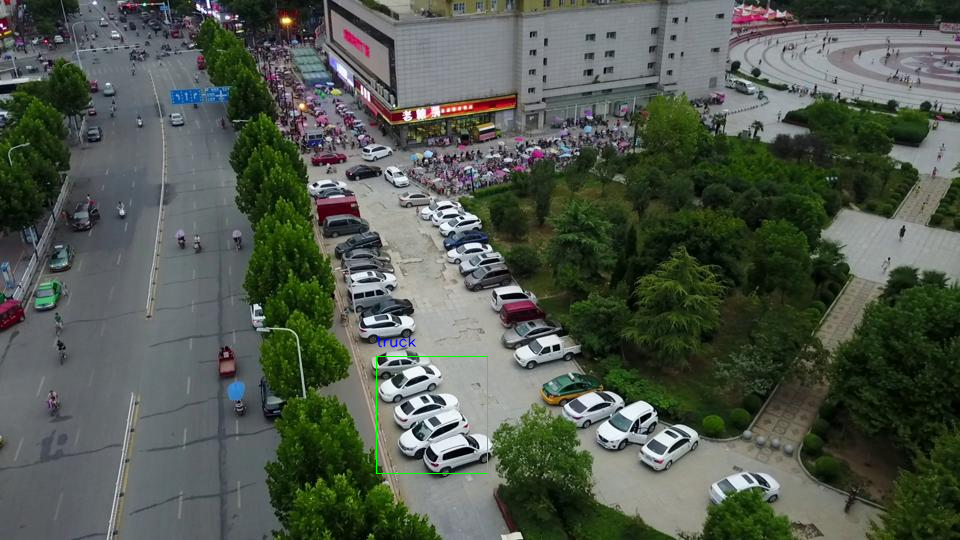

In [ ]:
cv2_imshow(igg)